# 군집화

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='AppleGothic')

In [2]:
from sklearn.datasets import make_blobs

blobs_x, blobs_y = make_blobs(n_samples=500, centers=5, shuffle=True, random_state=10)
# 기본적으로 500개를 제작할 것인데, (center = 중심)(군집 5개), shuffle : 랜덤

In [3]:
print(blobs_x.shape, blobs_y.shape)

(500, 2) (500,)


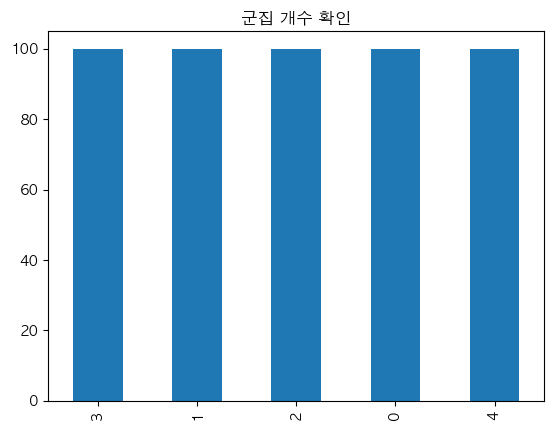

In [4]:
pd.value_counts(blobs_y).plot(kind='bar', title='군집 개수 확인')
plt.show()

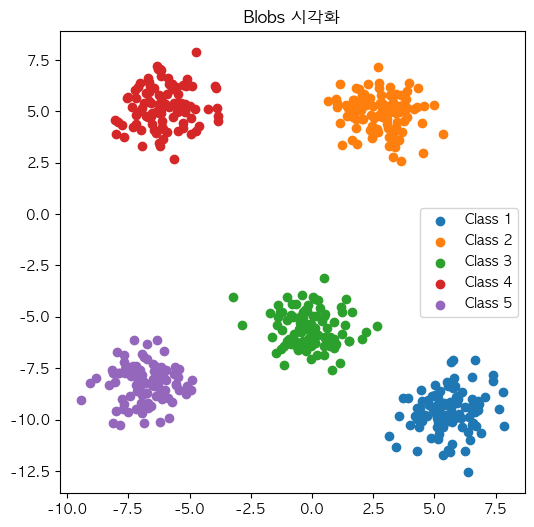

In [5]:
plt.figure(figsize=(6, 6))
plt.title('Blobs 시각화')
for c in np.unique(blobs_y) :
    plt.scatter(blobs_x[blobs_y == c, 0], blobs_x[blobs_y == c, 1], label = 'Class {}'.format(c+1))
    # c와 같은 값들 중 0과 1

plt.legend()
plt.show()        

In [6]:
from sklearn.datasets import make_moons

moons_x, moons_y = make_moons(n_samples=500, shuffle = True, random_state=0, noise=0.05)

print(moons_x.shape, moons_y.shape)

(500, 2) (500,)


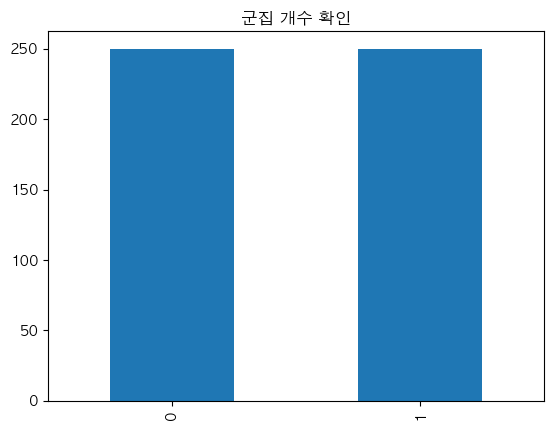

In [7]:
pd.value_counts(moons_y).plot(kind='bar', title='군집 개수 확인')
plt.show()

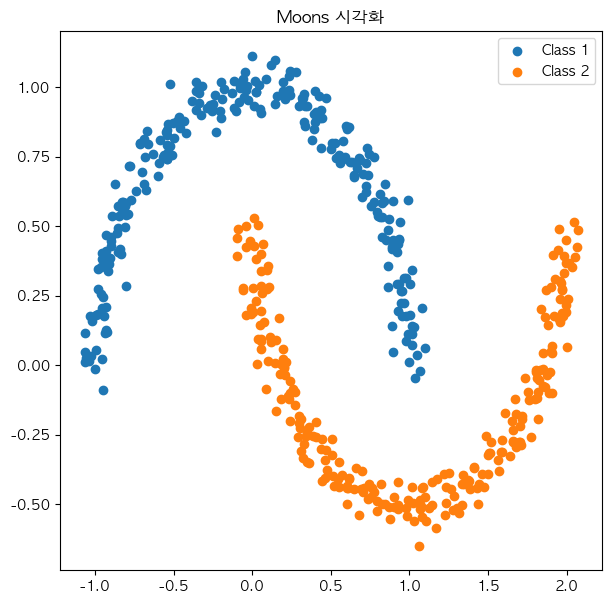

In [8]:
plt.figure(figsize=(7, 7))
plt.title('Moons 시각화')
for c in np.unique(moons_y) :
    plt.scatter(moons_x[moons_y == c, 0], moons_x[moons_y == c, 1], label = 'Class {}'.format(c+1))
    # c와 같은 값들 중 0과 1

plt.legend()
plt.show()        

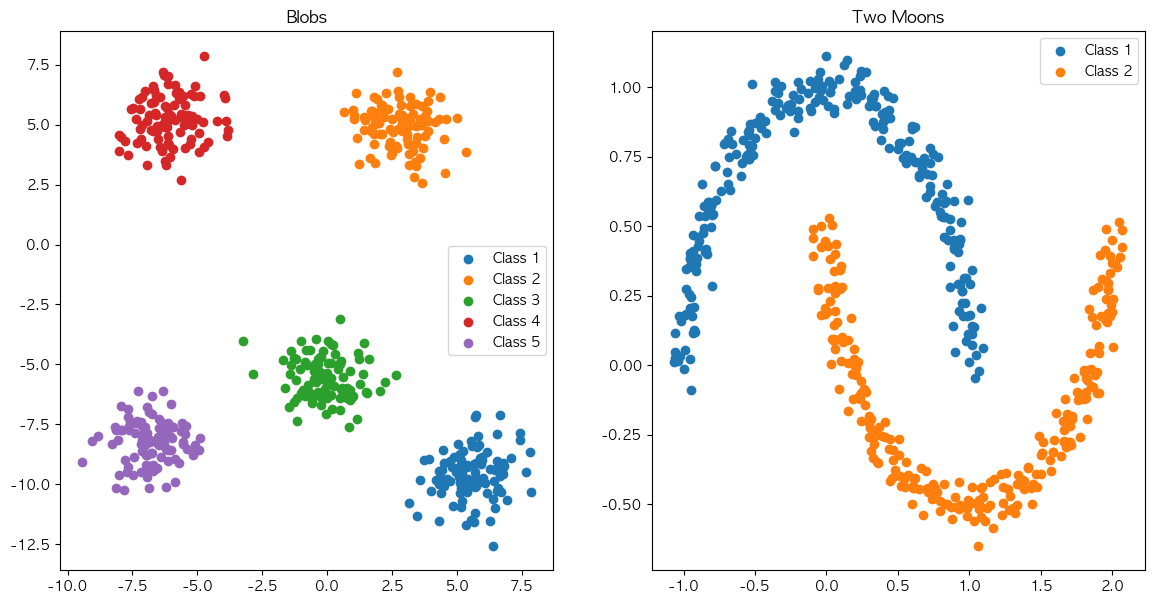

In [9]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title('Blobs')
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c, 0], blobs_x[blobs_y == c, 1], label='Class {}'.format(c+1))

plt.legend()

plt.subplot(1, 2, 2)
plt.title('Two Moons')
for c in np.unique(moons_y):
    plt.scatter(moons_x[moons_y == c, 0], moons_x[moons_y == c, 1], label='Class {}'.format(c+1))

plt.legend()

plt.show()

# 군집화(clustering) 알고리즘
- 데이터를 유사한 것들끼리 모으는 것
- 군집 간의 유사도(similarity)는 크게, 군집 내의 유사도는 작게

# 계층적 군집화(Hierarchical clustering)
- 군집화의 결과가 군집들이 계층적인 구조를 갖도록 하는 것
- 병합형(agglomerative) 계층적 군집화
- 분리형(ficisive) 계층적 군집화

# k-means 알고리즘
- 군집화 알고리즘
- 군집화 과정
  1) 군집의 중심 위치 선정
  2) 군집 중심을 기준으로 군집 재구성
  3) 군집별 평균 위치 결정
  4) 군집 평균 위치로 군집 중심 조정
  5) 수렴할 때까지 반복

# (1) 계층적 군집화
a. 거리 척도(Affinity) : 데이터 간의 유사도를 측정하는데 사용되는 거리 척도를 선택

ex) Eunclidean, Manhattan, Cosine 등

b. 군집별 거리 산출 방법(Linkage) : 클러스터 간의 거리를 측정하는데 사용되는 방법

ex)

    - Single : 두 클러스터 내의 모든 데이터 포인트간의 최소 거리를 사용한다.(Min)

    - Complete : 두 클러스터 내의 모든 데이터 포인트 간의 최대 거리를 사용한다.(Max)
    
    - Average : 두 클러스터 내의 모든 데이터 포인트 간의 평균 거리를 사용한다.
    
    - Ward : 클러스터 내의 분산의 증가량을 최소화하는 방향으로 거리를 계산한다.

In [10]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(
    linkage='complete',
    metric='euclidean',
    distance_threshold=5, # 클러스터 간의 거리가 해당 값 이하일 때 클러스터가 병합된다.
    n_clusters=None) # 클러스터의 개수

blobs_clusters = model.fit_predict(blobs_x)

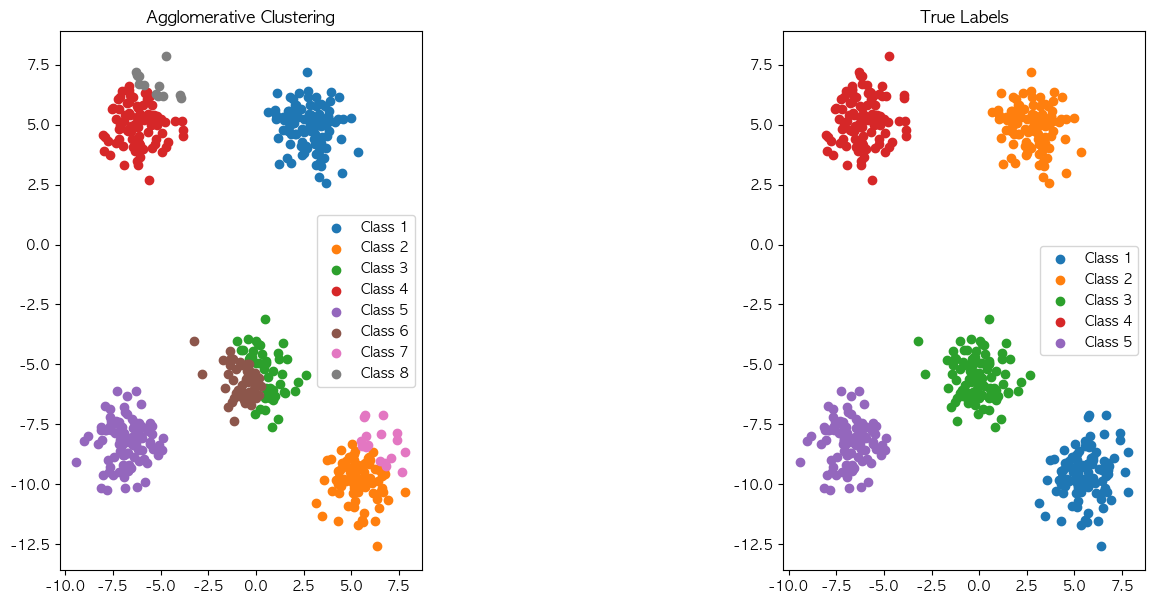

In [11]:
plt.figure(figsize=(14, 7))
plt.subplots_adjust(wspace=1)

plt.subplot(1, 2, 1)
plt.title('Agglomerative Clustering')
for c in np.unique(blobs_clusters):
    plt.scatter(blobs_x[blobs_clusters == c, 0], blobs_x[blobs_clusters == c, 1], label='Class {}'.format(c+1))

plt.legend()
plt.subplot(1, 2, 2)

plt.title('True Labels')

for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c, 0], blobs_x[blobs_y == c, 1], label = 'Class {}'.format(c+1))

plt.legend()
plt.show()

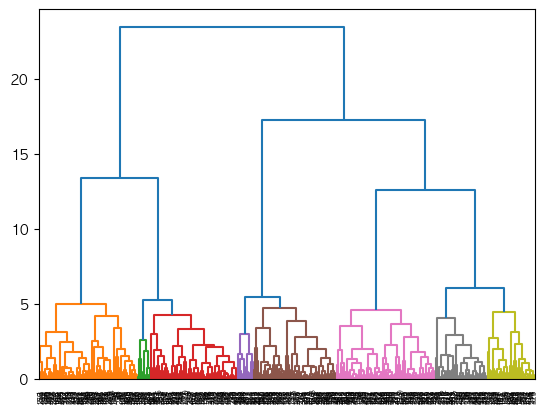

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(blobs_x, method='complete', metric='euclidean')
_ = dendrogram(linkage_matrix, color_threshold=5)

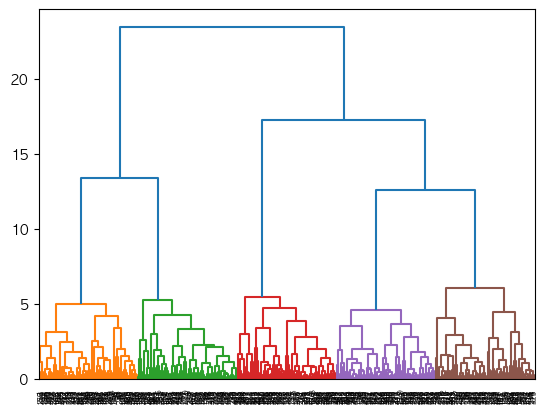

In [13]:
# 한 단계 더 낮추어 깔끔하게 출력
linkage_matrix = linkage(blobs_x, method='complete', metric='euclidean')
_ = dendrogram(linkage_matrix, color_threshold=10)

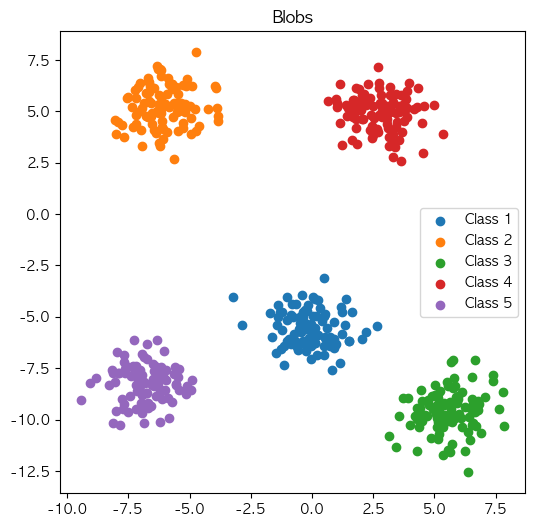

In [14]:
model = AgglomerativeClustering(
    linkage = 'complete', 
    metric = 'euclidean',
    distance_threshold = 10,
    n_clusters = None)

blobs_clusters = model.fit_predict(blobs_x)

plt.figure(figsize=(6, 6))
plt.title('Blobs')

for c in np.unique(blobs_clusters):
    plt.scatter(blobs_x[blobs_clusters == c, 0], blobs_x[blobs_clusters == c, 1], label='Class {}'.format(c+1))
plt.legend()
plt.show()

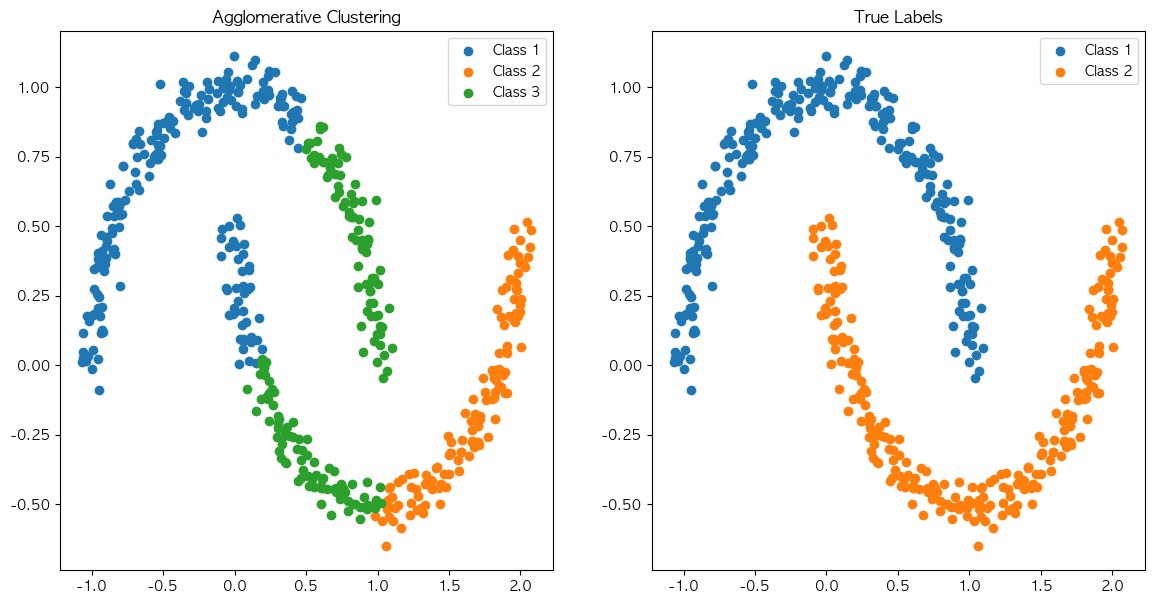

In [15]:
model = AgglomerativeClustering(
    linkage = 'complete', 
    metric = 'euclidean',
    distance_threshold = 2,
    n_clusters = None)

moons_clusters = model.fit_predict(moons_x)

plt.figure(figsize=(14, 7))
plt.subplots_adjust(wspace=0.2)

plt.subplot(1, 2, 1)
plt.title('Agglomerative Clustering')
for c in np.unique(moons_clusters):
    plt.scatter(moons_x[moons_clusters == c, 0], moons_x[moons_clusters == c, 1], label='Class {}'.format(c+1))

plt.legend()
plt.subplot(1, 2, 2)

plt.title('True Labels')

for c in np.unique(moons_y):
    plt.scatter(moons_x[moons_y == c, 0], moons_x[moons_y == c, 1], label = 'Class {}'.format(c+1))

plt.legend()
plt.show()

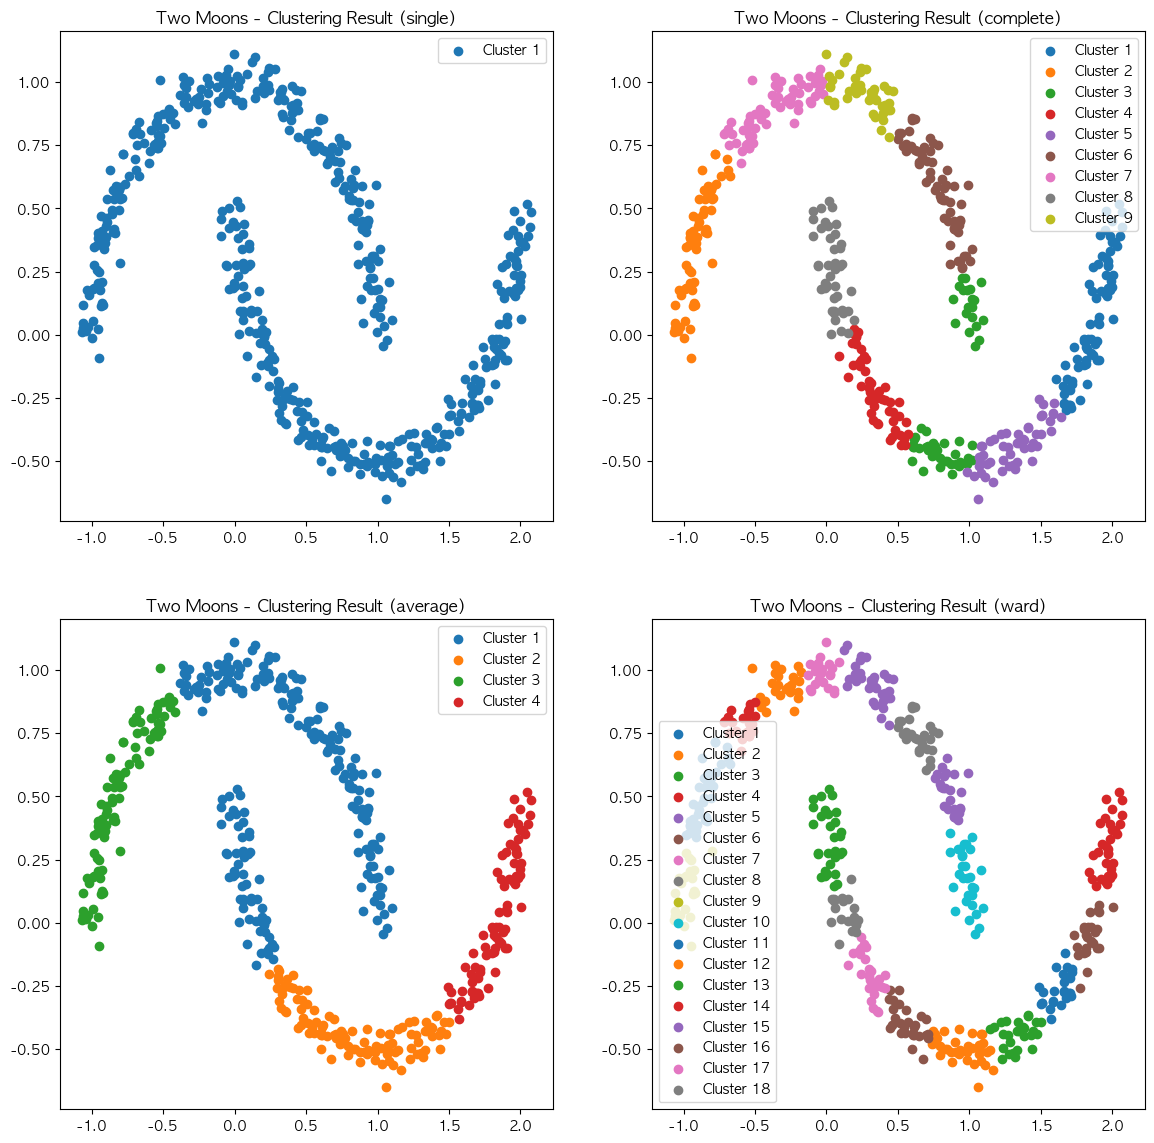

In [16]:
# Linkage 변경
model = AgglomerativeClustering(
    linkage = 'complete', # 기본 링크를 complete로 설정, 루프에서 업데이트 예정
    metric = 'euclidean',
    distance_threshold=1,
    n_clusters=None)

linkage_list = ['single', 'complete', 'average', 'ward']
cluster_results = {}
for _linkage in linkage_list:
    model.linkage = _linkage
    _results = model.fit_predict(moons_x)
    cluster_results[_linkage] = _results

plt.figure(figsize = (14, 14))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

for i, _linkage in enumerate(linkage_list):
    # print(i)
    # print('{}'.format(_linkage))
    plt.subplot(2, 2, i+1)
    plt.title('Two Moons - Clustering Result ({})'.format(_linkage))
    _results = cluster_results[_linkage]
    for c in np.unique(_results):
        plt.scatter(moons_x[_results == c, 0], moons_x[_results == c, 1], label='Cluster {}'.format(c+1))
    plt.legend()
plt.show()

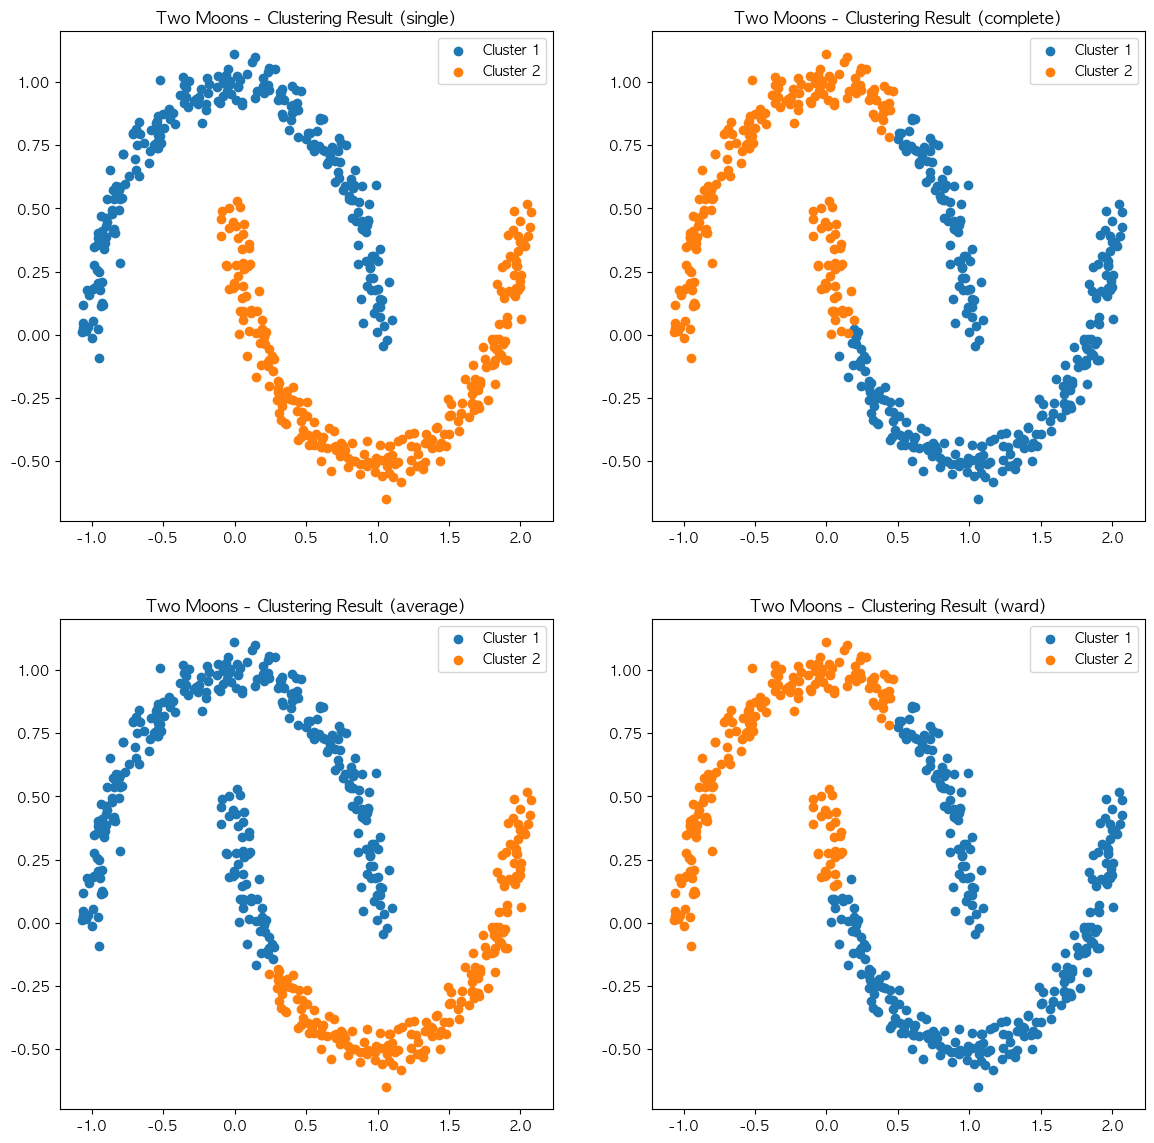

In [17]:
# Linkage 변경
model = AgglomerativeClustering(
    linkage = 'complete', # 기본 링크를 complete로 설정, 루프에서 업데이트 예정
    metric = 'euclidean',
    distance_threshold=None,
    n_clusters=2)

linkage_list = ['single', 'complete', 'average', 'ward']
cluster_results = {}
for _linkage in linkage_list:
    model.linkage = _linkage
    _results = model.fit_predict(moons_x)
    cluster_results[_linkage] = _results

plt.figure(figsize = (14, 14))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

for i, _linkage in enumerate(linkage_list):
    # print(i)
    # print('{}'.format(_linkage))
    plt.subplot(2, 2, i+1)
    plt.title('Two Moons - Clustering Result ({})'.format(_linkage))
    _results = cluster_results[_linkage]
    for c in np.unique(_results):
        plt.scatter(moons_x[_results == c, 0], moons_x[_results == c, 1], label='Cluster {}'.format(c+1))
    plt.legend()
plt.show()

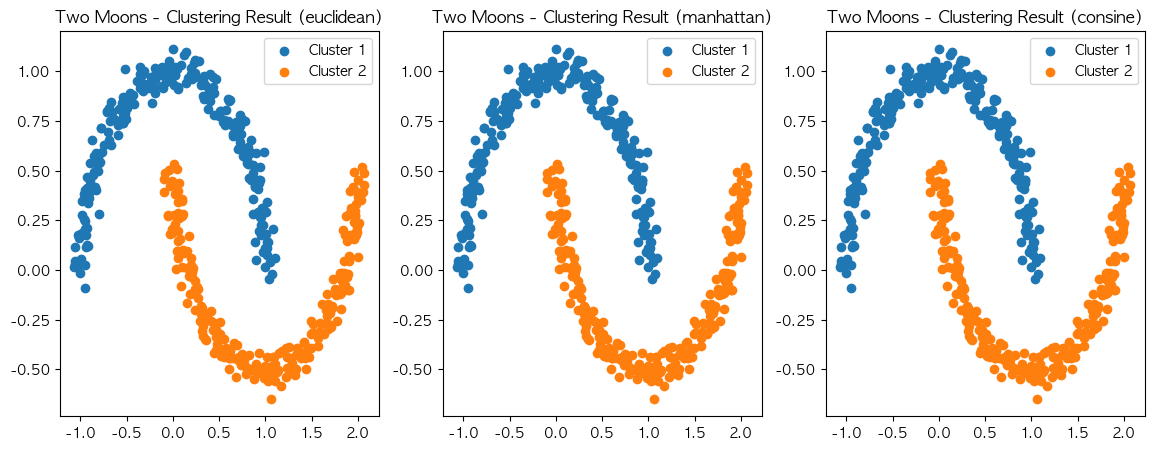

In [18]:
# 거리 계산 종류 변경
# Linkage 변경
model = AgglomerativeClustering(
    linkage = 'single', # 기본 링크를 complete로 설정, 루프에서 업데이트 예정
    metric = 'euclidean',
    distance_threshold=None,
    n_clusters=2)

distance_list = ['euclidean', 'manhattan', 'consine']
cluster_results = {}
for _distance in distance_list:
    model.affinity = _distance
    _results = model.fit_predict(moons_x)
    cluster_results[_distance] = _results

plt.figure(figsize = (14, 5))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

for i, _distance in enumerate(distance_list):
    # print(i)
    # print('{}'.format(_linkage))
    plt.subplot(1, 3, i+1)
    plt.title('Two Moons - Clustering Result ({})'.format(_distance))
    _results = cluster_results[_distance]
    for c in np.unique(_results):
        plt.scatter(moons_x[_results == c, 0], moons_x[_results == c, 1], label='Cluster {}'.format(c+1))
    plt.legend()
plt.show()

# K-means 군집화
- n_clusters 통해 사전에 군집 개수를 설정해야 한다.
- init : 군집화의 초기 중심을 설정하는 방법(random, k-means++)
- n_init : K-means 알고리즘을 반복할 횟수를 지정(그 중 가장 좋은 결과를 출력) 클러스터 군집 중심까지의 거리가 가장 작은 결과
- max_iter : 업데이트 횟수

In [19]:
model = KMeans(
    n_clusters = 5,
    init = 'random',
    n_init = 1,
    random_state = 42)

blobs_clusters = model.fit_predict(blobs_x)

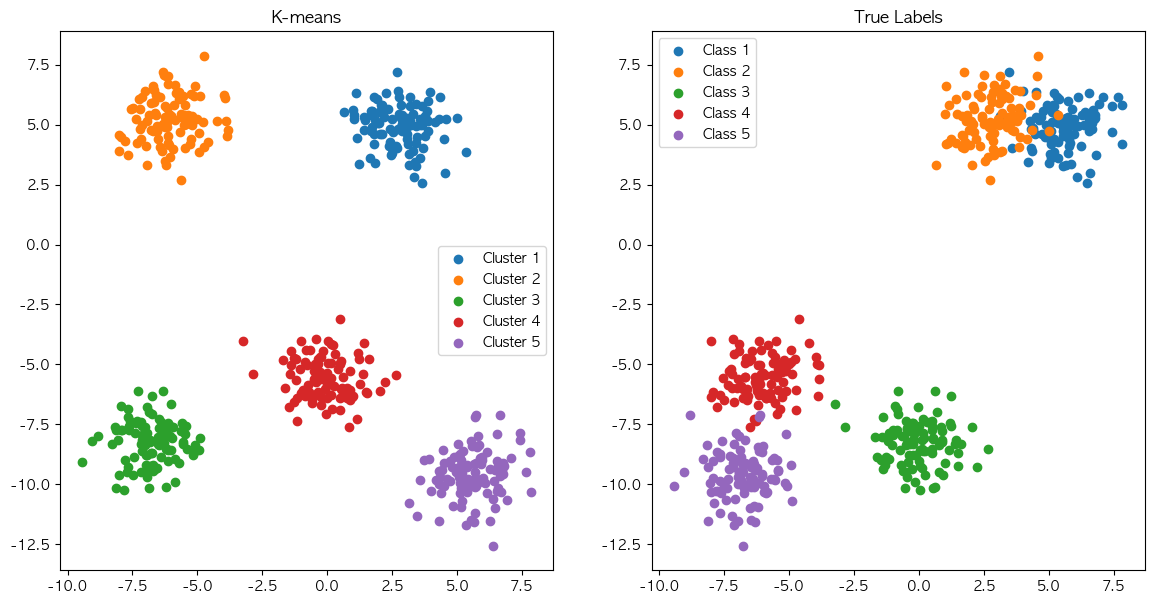

In [20]:
plt.figure(figsize=(14, 7))
plt.subplots_adjust(wspace = 0.2)

plt.subplot(1, 2, 1)
plt.title('K-means')

for c in np.unique(blobs_clusters):
    plt.scatter(blobs_x[blobs_clusters == c, 0], blobs_x[blobs_clusters == c, 1], label = 'Cluster {}'.format(c+1))

plt.legend()

plt.subplot(1, 2, 2)
plt.title('True Labels')

for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c, 0], blobs_x[blobs_clusters == c, 1], label = 'Class {}'.format(c+1))

plt.legend()
plt.show()

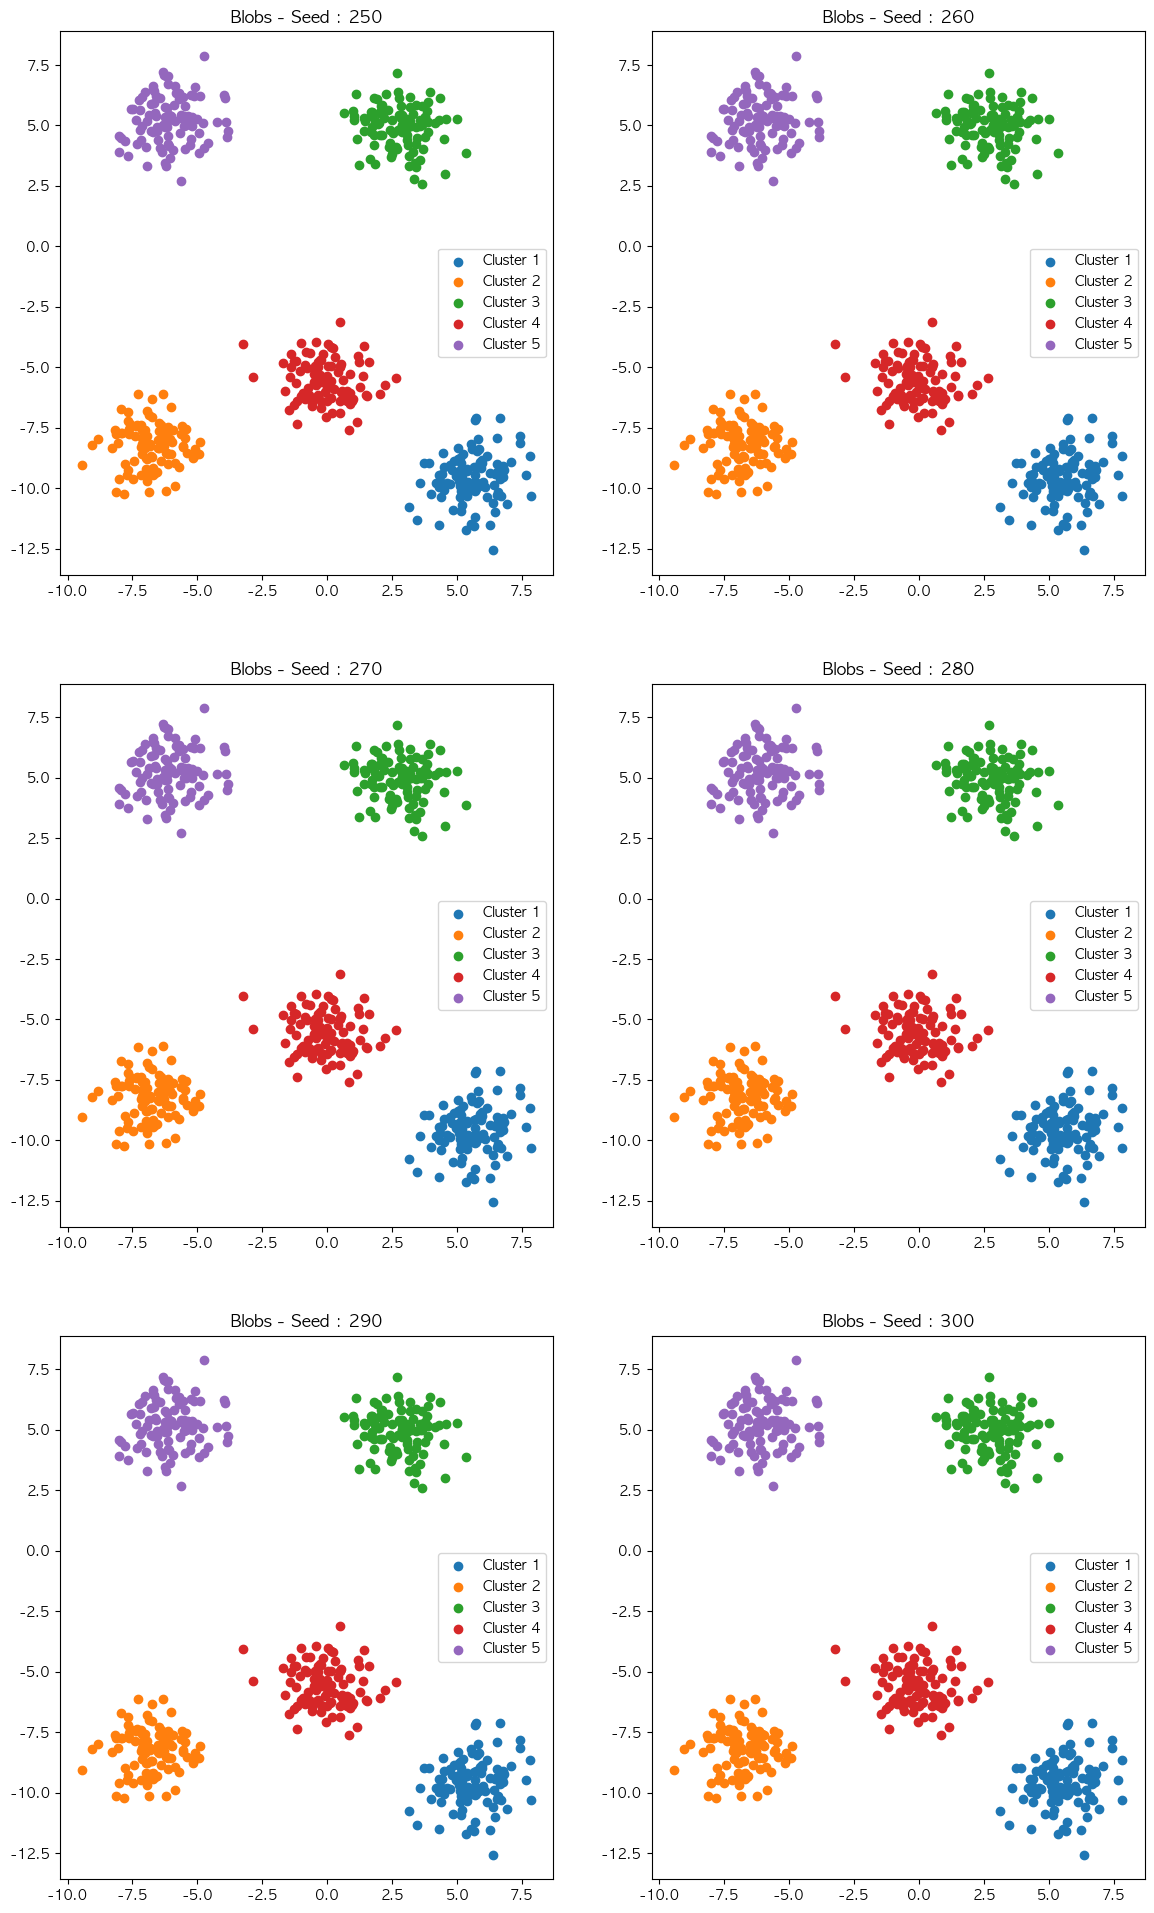

In [21]:
model = KMeans(
    n_clusters = 5,
    init = 'random',
    n_init = 1)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}

for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(blobs_x)
    cluster_results[_seed] = _results

plt.figure(figsize=(14, 24))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Blobs - Seed : {}'.format(_seed))
    _result = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(blobs_x[_results == c, 0], blobs_x[_results == c, 1], label='Cluster {}'.format(c+1))
    plt.legend()
plt.show()

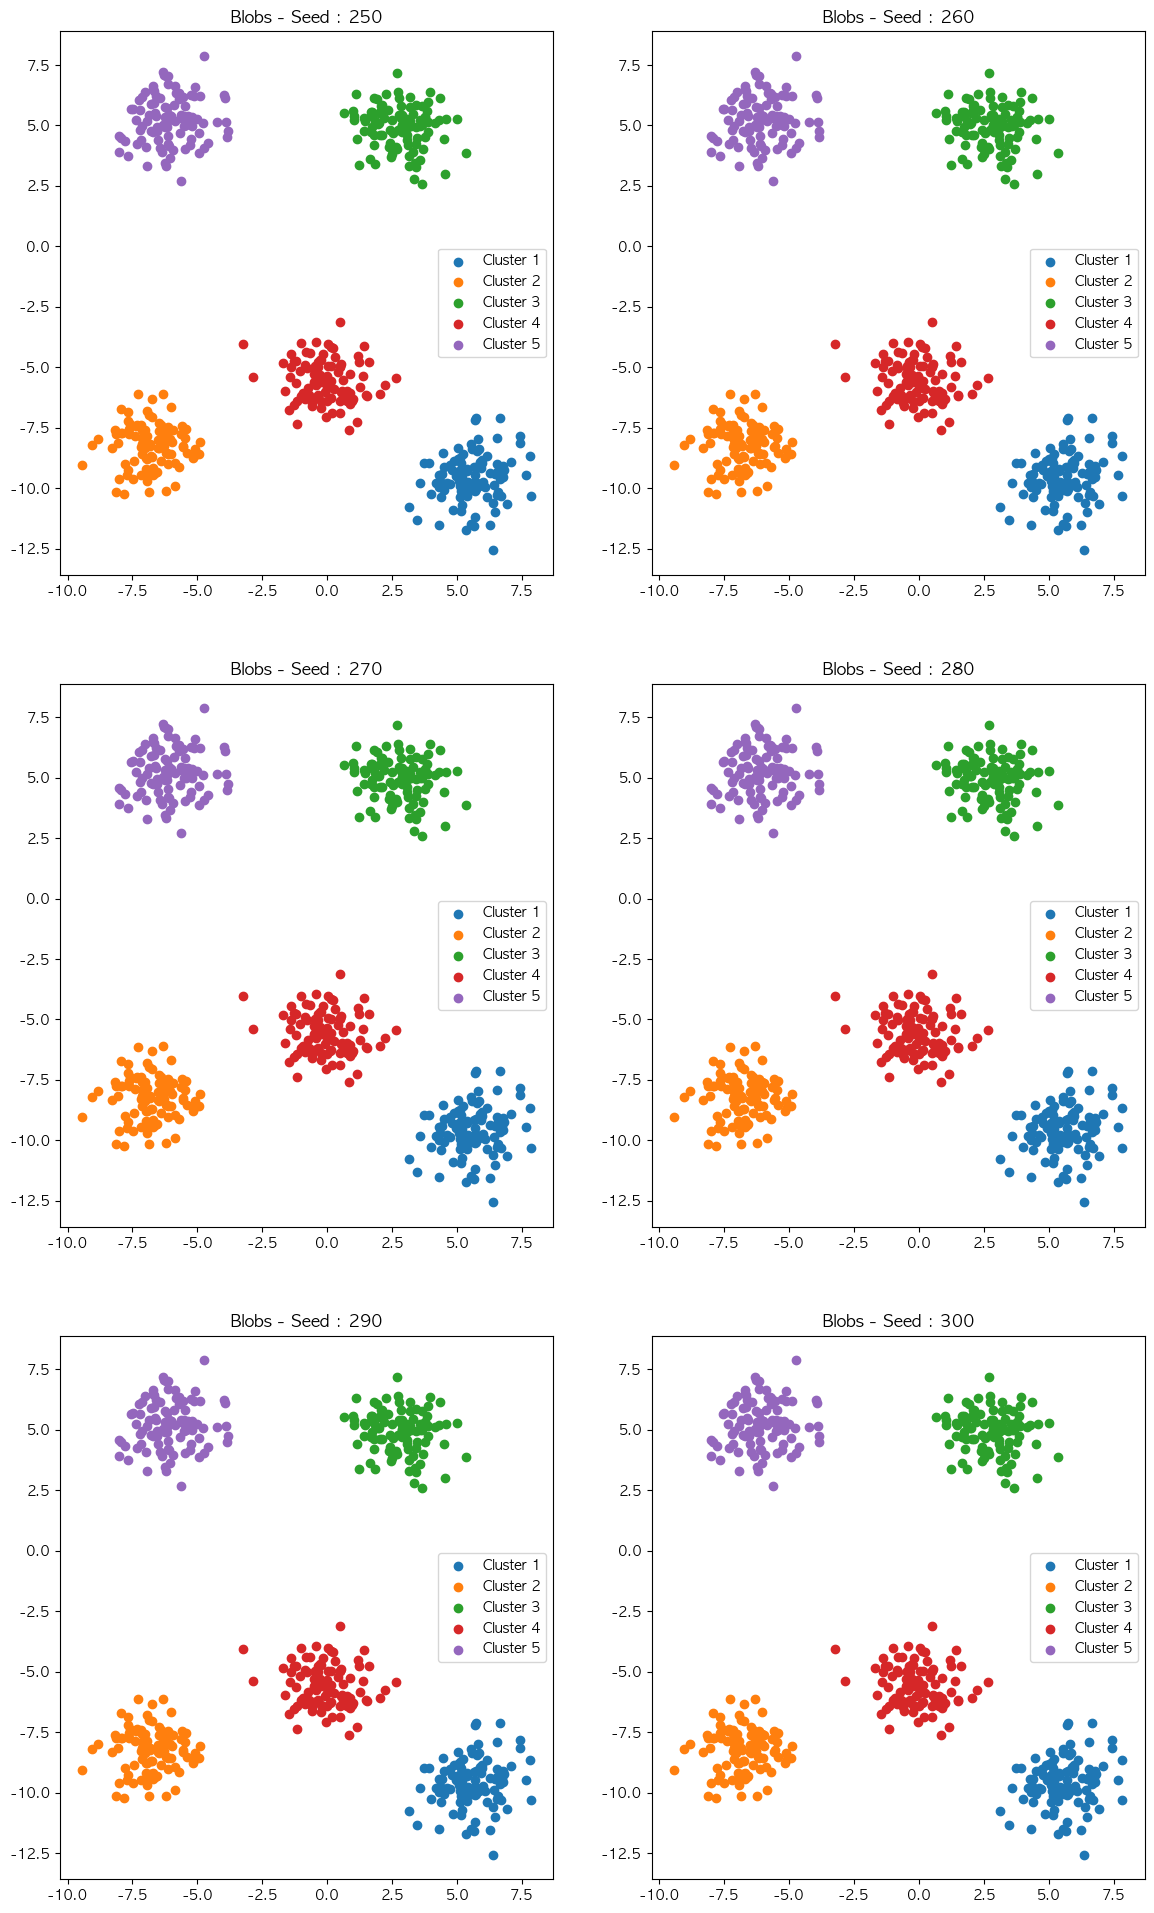

In [22]:
model = KMeans(
    n_clusters = 5,
    init = 'random',
    n_init = 3)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}

for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(blobs_x)
    cluster_results[_seed] = _results

plt.figure(figsize=(14, 24))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Blobs - Seed : {}'.format(_seed))
    _result = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(blobs_x[_results == c, 0], blobs_x[_results == c, 1], label='Cluster {}'.format(c+1))
    plt.legend()
plt.show()

# k-means++이란?
: k-means 클러스터링 알고리즘 중 하나이다.

1) 첫 번째 중심점 선택 : 무작위
2) 나머지 중심점(두 번째 이후)(어느정도의 거리계산이 되어 있는 상황)
    - 각 데이터 포인트와 가장 가까운 중심점 간의 거리 제곱을 계산한다.
    - 거리 제곱의 확률 분포에서 무작위로 데이터 포인트를 선택하여 새로운 중심점으로 지정한다.
    - 중심점이 k개가 될 때까지 반복한다.
3) 거리 제곱의 확률 분포에서 중심점을 선택함으로 기존 중심점으로부터 멀리 떨어진 데이터 포인트를 선택할 가능성을 높인다.

   => 랜덤보다 정확하게 지정 가능(알고리즘 속도 등 향상)

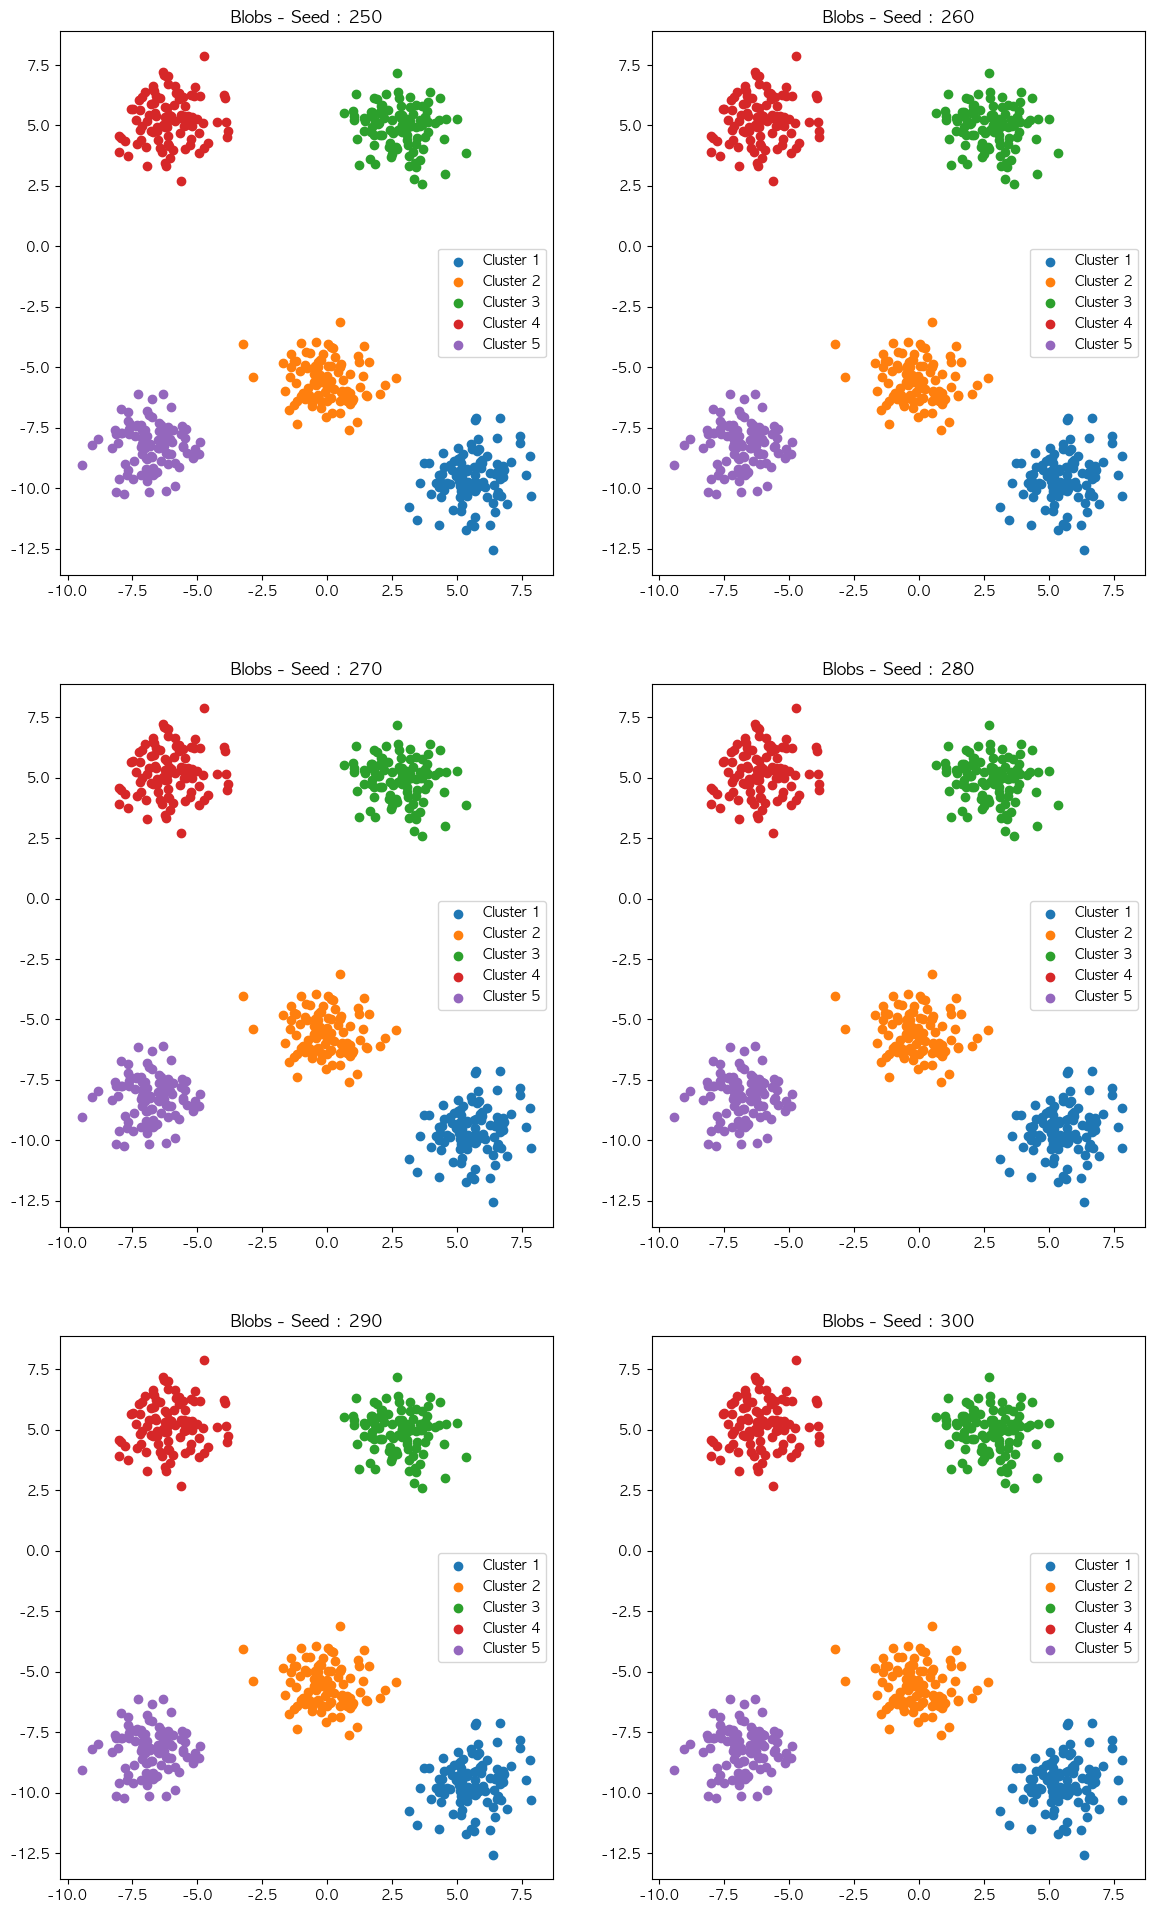

In [23]:
# cluster의 개수 지정하여 작업 진행
model = KMeans(
    n_clusters = 5,
    init = 'k-means++',
    n_init = 1)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(blobs_x)
    cluster_results[_seed] = _results

plt.figure(figsize=(14, 24))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Blobs - Seed : {}'.format(_seed))
    _result = cluster_results[_seed] # 랜덤값에 따른 값 처리
    for c in np.unique(_results):
        plt.scatter(blobs_x[_results == c, 0], blobs_x[_results == c, 1], label='Cluster {}'.format(c+1))
    plt.legend()
plt.show()


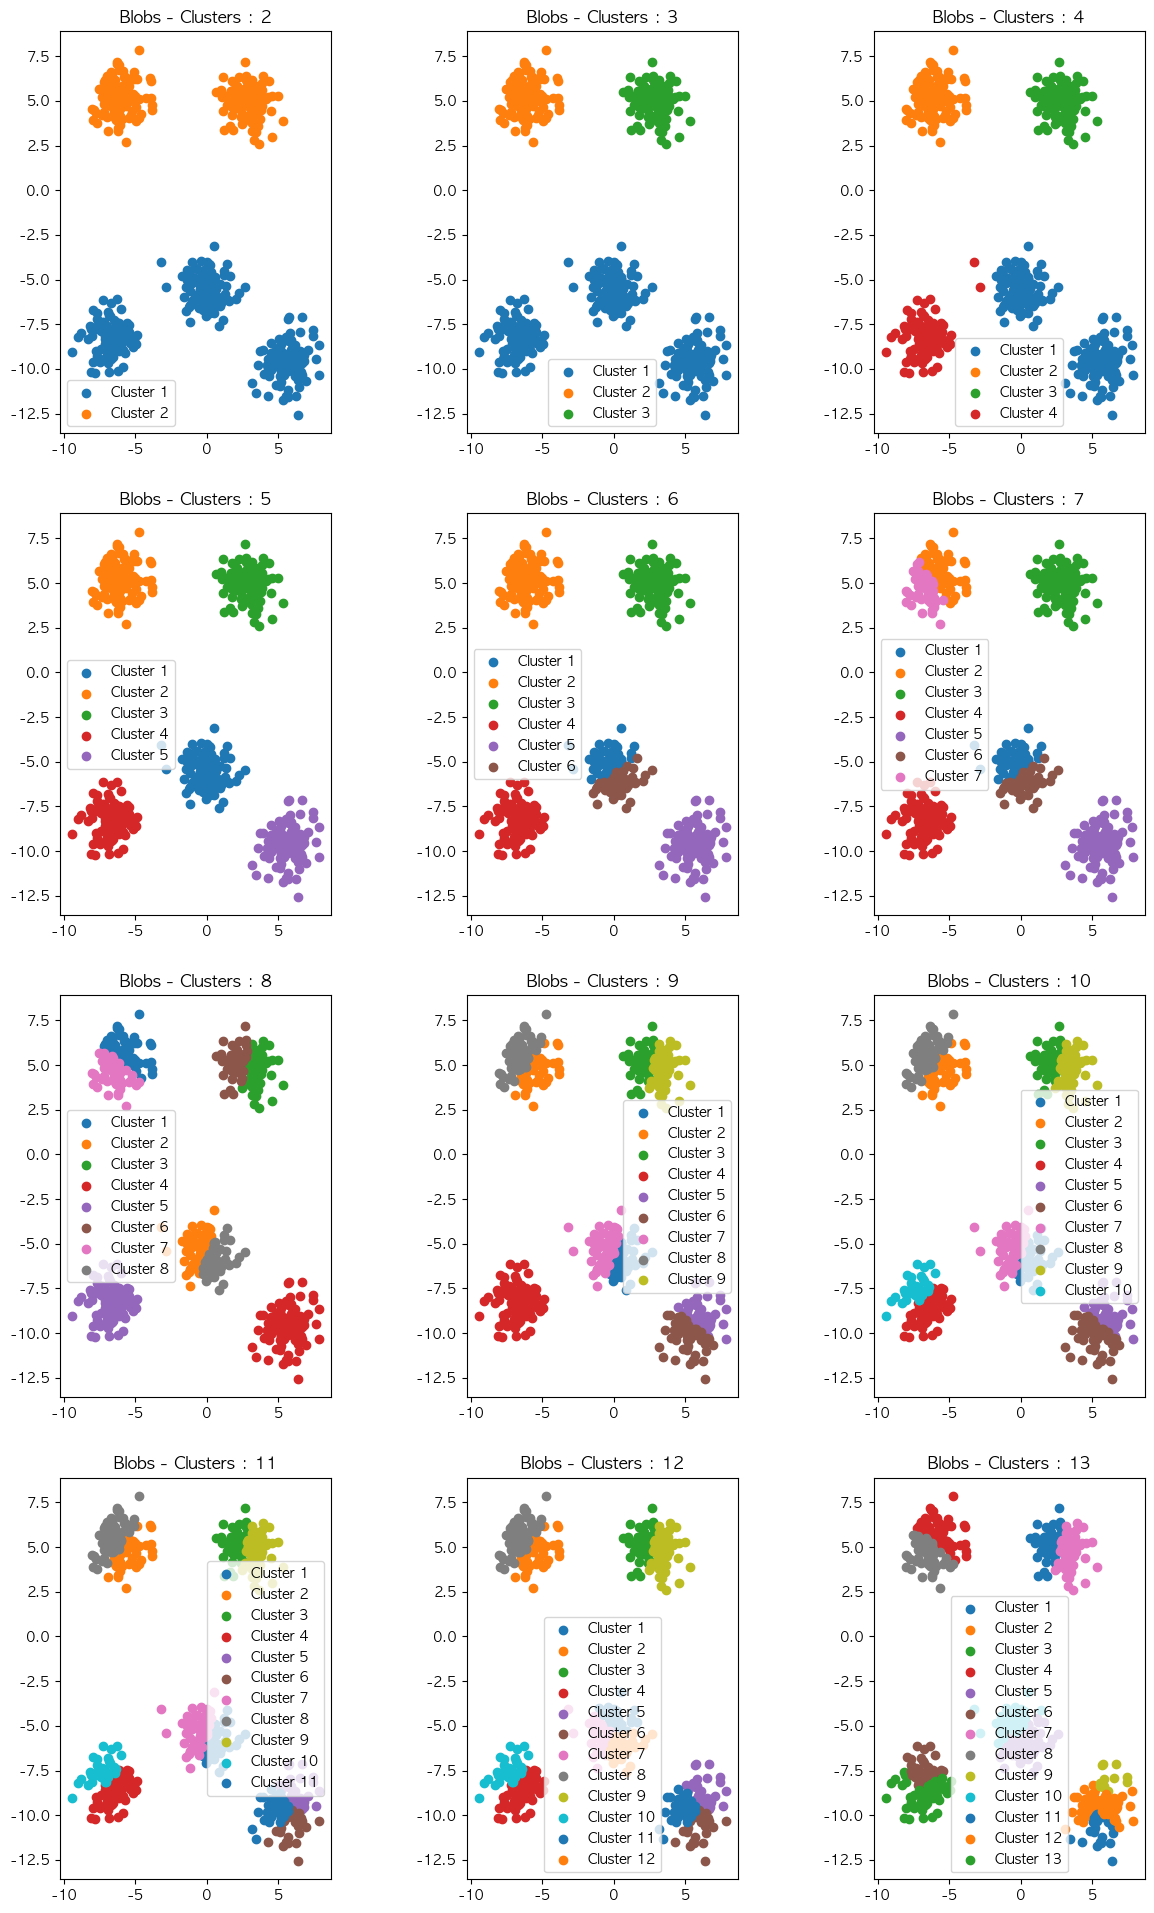

In [24]:
# 클러스터 개수 2~13개로 subplots (4, 3) 형태로 그려보기
# random_state는 42로 고정
# n_init는 3으로 고정
# init는 'k-means++'
model = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=3,
    random_state=42
)

cluster_results = {}

for _n_clusters in np.arange(2, 14):
    model.n_clusters = _n_clusters
    cluster_results[_n_clusters] = model.fit_predict(blobs_x)
    # 각 숫자에 원하는 모델을 넣어주겠다.

plt.figure(figsize=(14, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.2)

for i, _n_clusters in enumerate(np.arange(2, 14)):
    plt.subplot(4, 3, i+1)
    plt.title('Blobs - Clusters : {}'.format(_n_clusters))
    _results = cluster_results[_n_clusters] # 랜덤값에 따른 값 처리
    for c in np.unique(_results):
        plt.scatter(blobs_x[_results == c, 0], blobs_x[_results == c, 1], label='Cluster {}'.format(c+1))
    plt.legend()
plt.show()


In [25]:
# python에서 범위 지정해주는 역할
a = range(1, 10)
a

range(1, 10)

In [26]:
# numpy에서 리스트를 만들어주는 역할
a = np.arange(1, 10)
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# 실루엣 스코어(Silhouette_Score)
: 클러스터링 결과의 품질을 판단하는 평가 지표(각 데이터 포인트내의 응집도와 클러스터 간 분리도를 종합적으로 고려)

- 데이터 포인트 i와 현재 클러스터 내에 속해있는 다른 포인트에 대해 포인트들과의 평균 거리
- 데이터 포인트 i와 가장 가까운 다른 클러스터에 포함되어 있는 평균 거리(를 구해 해당 부분을 가지고 판단해준다.)
- (-1, 1)에서 값이 1일 수록 좋은 클러스터링 결과이다.

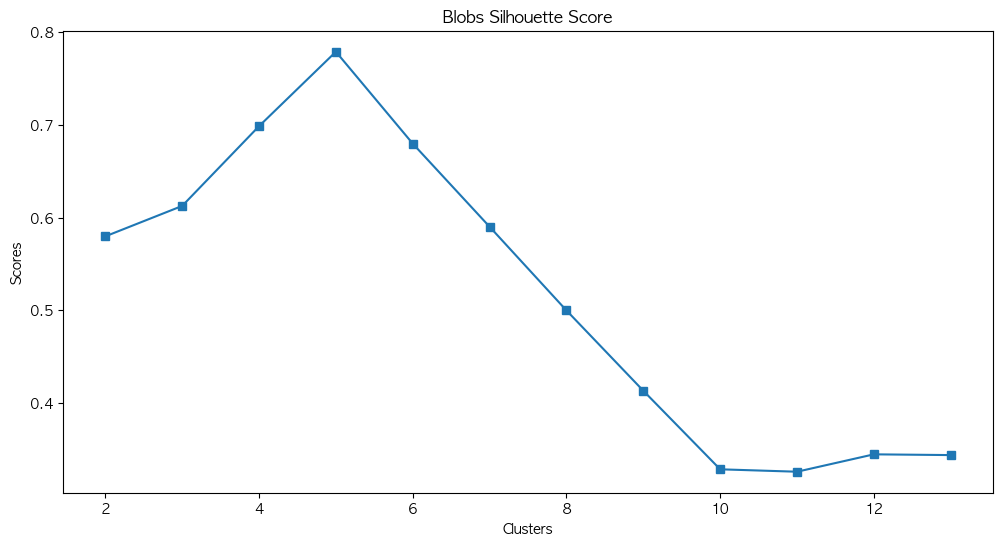

In [27]:
from sklearn.metrics import silhouette_score

model = KMeans(
    n_clusters = 2,
    init = 'k-means++',
    n_init=10,
    random_state=0
)

scores = []
cluster_results = {}

for _n_clusters in np.arange(2, 14):
    model.n_clusters = _n_clusters
    cluster_results[_n_clusters] = model.fit_predict(blobs_x)
    scores.append(silhouette_score(blobs_x, model.labels_))

plt.figure(figsize=(12, 6))
plt.title('Blobs Silhouette Score')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.plot(np.arange(2, 14), scores, marker='s')
plt.show()

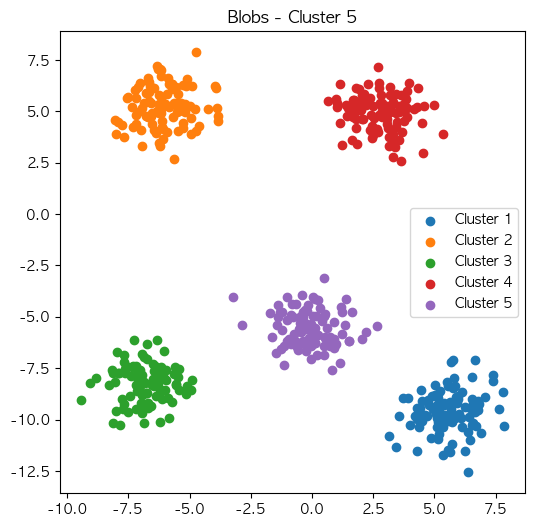

In [28]:
plt.figure(figsize=(6, 6))
plt.title('Blobs - Cluster 5')
_results = cluster_results[5]
for c in np.unique(_results):
    plt.scatter(blobs_x[_results == c, 0], blobs_x[_results == c, 1], label='Cluster {}'.format(c+1))

plt.legend()
plt.show()

가장 높은 실루엣 스코어를 가지는 클러스터 개수: 8


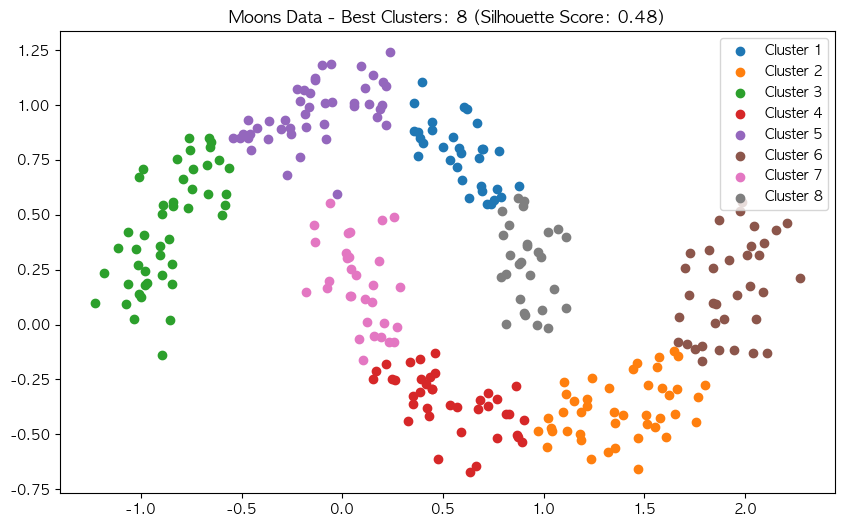

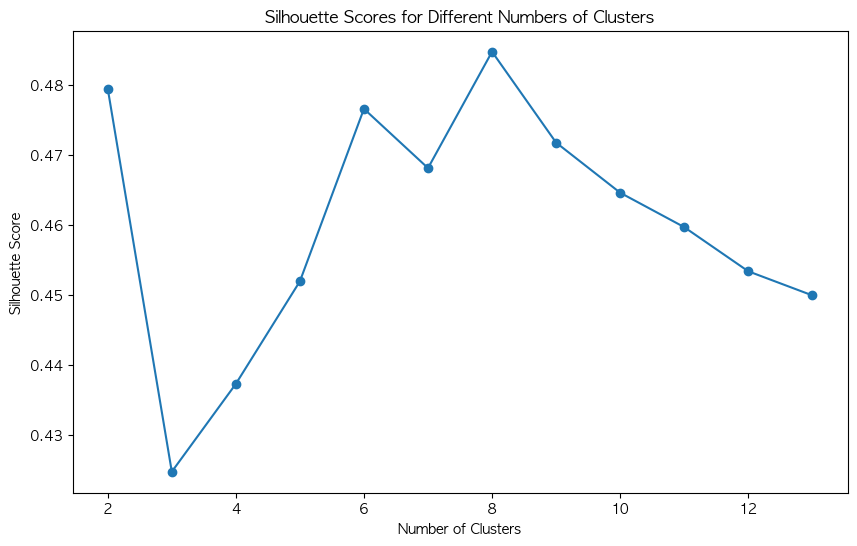

In [29]:
# 숙제1 : moons 데이터 중 실루엣 스코어가 가장 높은 cluster 개수가 몇 개인지 확인해보고 그래프 그리기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

moons_x, moons_y = make_moons(n_samples=300, noise=0.1, random_state=42)

silhouette_scores = []

for n_clusters in range(2, 14):
    model = KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        n_init=3,
        random_state=42
    )
    
    cluster_labels = model.fit_predict(moons_x)
    silhouette_avg = silhouette_score(moons_x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

best_n_clusters = range(2, 14)[np.argmax(silhouette_scores)]
print(f'가장 높은 실루엣 스코어를 가지는 클러스터 개수: {best_n_clusters}')

best_model = KMeans(
    n_clusters=best_n_clusters,
    init='k-means++',
    n_init=3,
    random_state=42
)
best_cluster_labels = best_model.fit_predict(moons_x)

plt.figure(figsize=(10, 6))
plt.title(f'Moons Data - Best Clusters: {best_n_clusters} (Silhouette Score: {max(silhouette_scores):.2f})')
for c in np.unique(best_cluster_labels):
    plt.scatter(moons_x[best_cluster_labels == c, 0], moons_x[best_cluster_labels == c, 1], label=f'Cluster {c+1}')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(2, 14), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [30]:
# conda install 해오기

가장 높은 실루엣 스코어를 가지는 클러스터 개수: 2


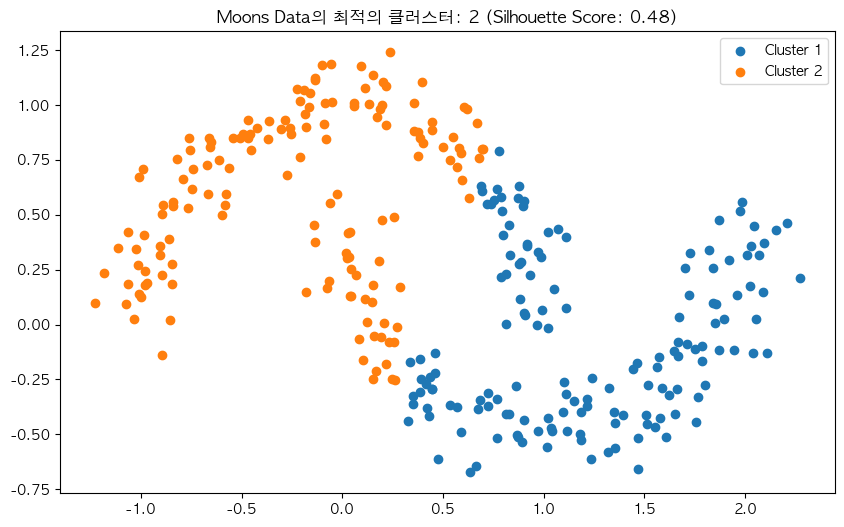

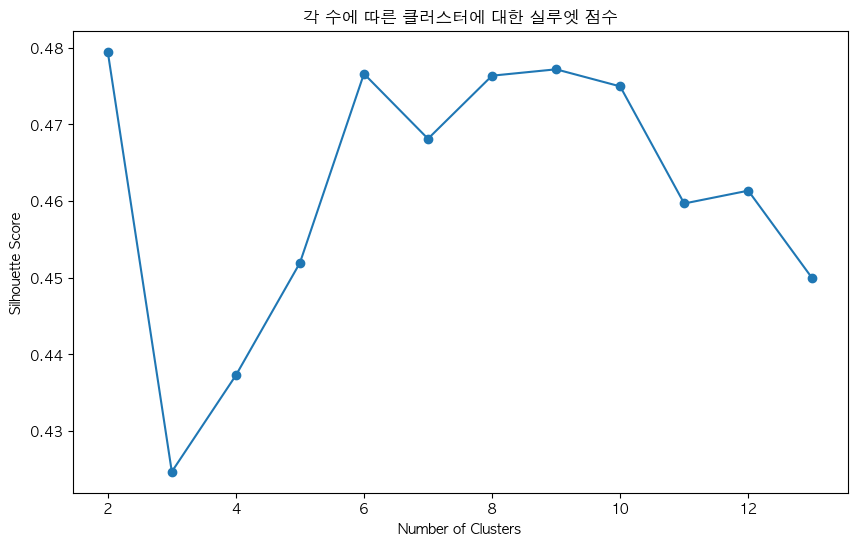

In [32]:
# 숙제1 : moons 데이터 중 실루엣 스코어가 가장 높은 cluster 개수가 몇 개인지 확인해보고 그래프 그리기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

moons_x, moons_y = make_moons(n_samples=300, noise=0.1, random_state=42)

silhouette_scores = []
for n_clusters in range(2, 14):
    model = KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        n_init=10,
        random_state=42
    )
    cluster_labels = model.fit_predict(moons_x)
    silhouette_avg = silhouette_score(moons_x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

best_n_clusters = range(2, 14)[np.argmax(silhouette_scores)]
print(f'가장 높은 실루엣 스코어를 가지는 클러스터 개수: {best_n_clusters}')

best_model = KMeans(
    n_clusters=best_n_clusters,
    init='k-means++',
    n_init=3,
    random_state=42
)
best_cluster_labels = best_model.fit_predict(moons_x)

plt.figure(figsize=(10, 6))
plt.title(f'Moons Data의 최적의 클러스터: {best_n_clusters} (Silhouette Score: {max(silhouette_scores):.2f})')
for c in np.unique(best_cluster_labels):
    plt.scatter(moons_x[best_cluster_labels == c, 0], moons_x[best_cluster_labels == c, 1], label=f'Cluster {c+1}')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(2, 14), silhouette_scores, marker='o')
plt.title('각 수에 따른 클러스터에 대한 실루엣 점수')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
# 과제1 강사님 코드